[Reference]
https://github.com/gustavovelascoh/octane-NIR
* octane.xlsx - octane NIR dataset provided by CAMO Software.
* gasoline.csv - gasoline NIR dataset exported from pls R package

In [1]:
import numpy as np
import pandas as pd

def import_dataset(ds_name='octane'):
    """
    ds_name: Name of the dataset ('octane', 'gasoline')
    Returns:
    wls: Numpy ndarray: List of wavelength
    xdata: Pandas DataFrame: Measurements
    ydata: Pandas Series: Octane numbers
    """

    if ds_name == 'octane':
        oct_df = pd.read_excel('octane.xlsx')
        wls = np.array([int(i) for i in oct_df.columns.values[2:]])
        xdata = oct_df.loc[:, '1100':]
        ydata = oct_df['Octane number']
    elif ds_name == 'gasoline':
        import re

        gas_df = pd.read_csv('gasoline.csv')
        reg = re.compile('([0-9]+)')
        wls = np.array([int(reg.findall(i)[0]) for i in gas_df.columns.values[1:]])
        xdata = gas_df.loc[:, 'NIR.900 nm':]
        ydata = gas_df['octane']
    else:
        exit('Invalid Dataset')

    return wls, xdata, ydata

In [43]:
dataset = 'gasoline'
#dataset = 'octane'
wls, xdata, ydata = import_dataset(dataset)

In [44]:
print(len(wls))
wls

401


array([ 900,  902,  904,  906,  908,  910,  912,  914,  916,  918,  920,
        922,  924,  926,  928,  930,  932,  934,  936,  938,  940,  942,
        944,  946,  948,  950,  952,  954,  956,  958,  960,  962,  964,
        966,  968,  970,  972,  974,  976,  978,  980,  982,  984,  986,
        988,  990,  992,  994,  996,  998, 1000, 1002, 1004, 1006, 1008,
       1010, 1012, 1014, 1016, 1018, 1020, 1022, 1024, 1026, 1028, 1030,
       1032, 1034, 1036, 1038, 1040, 1042, 1044, 1046, 1048, 1050, 1052,
       1054, 1056, 1058, 1060, 1062, 1064, 1066, 1068, 1070, 1072, 1074,
       1076, 1078, 1080, 1082, 1084, 1086, 1088, 1090, 1092, 1094, 1096,
       1098, 1100, 1102, 1104, 1106, 1108, 1110, 1112, 1114, 1116, 1118,
       1120, 1122, 1124, 1126, 1128, 1130, 1132, 1134, 1136, 1138, 1140,
       1142, 1144, 1146, 1148, 1150, 1152, 1154, 1156, 1158, 1160, 1162,
       1164, 1166, 1168, 1170, 1172, 1174, 1176, 1178, 1180, 1182, 1184,
       1186, 1188, 1190, 1192, 1194, 1196, 1198, 12

In [45]:
print(xdata.shape)
xdata.head()

(60, 401)


,NIR.900 nm,NIR.902 nm,NIR.904 nm,NIR.906 nm,NIR.908 nm,NIR.910 nm,NIR.912 nm,NIR.914 nm,NIR.916 nm,NIR.918 nm,...,NIR.1682 nm,NIR.1684 nm,NIR.1686 nm,NIR.1688 nm,NIR.1690 nm,NIR.1692 nm,NIR.1694 nm,NIR.1696 nm,NIR.1698 nm,NIR.1700 nm
1,-0.050193,-0.045903,-0.042187,-0.037177,-0.033348,-0.031207,-0.030036,-0.031298,-0.034217,-0.036012,...,1.198461,1.224243,1.242645,1.250789,1.246626,1.250985,1.264189,1.244678,1.245913,1.221135
2,-0.044227,-0.039602,-0.035673,-0.030911,-0.026675,-0.023871,-0.022571,-0.025410,-0.028960,-0.032740,...,1.128877,1.148342,1.189116,1.223242,1.253306,1.282889,1.215065,1.225211,1.227985,1.198851
3,-0.046867,-0.041260,-0.036979,-0.031458,-0.026520,-0.023346,-0.021392,-0.024993,-0.029309,-0.033920,...,1.147964,1.167798,1.198287,1.237383,1.260979,1.276677,1.218871,1.223132,1.230321,1.208742
4,-0.046705,-0.042240,-0.038561,-0.034513,-0.030206,-0.027680,-0.026042,-0.028280,-0.030920,-0.034012,...,1.160089,1.169350,1.201066,1.233299,1.262966,1.272709,1.211068,1.215044,1.232655,1.206696
5,-0.050859,-0.045145,-0.041025,-0.036357,-0.032747,-0.031498,-0.031415,-0.034611,-0.037781,-0.040752,...,1.252712,1.238013,1.259616,1.273713,1.296524,1.299507,1.226448,1.230718,1.232864,1.202926


In [46]:
print(ydata.shape)
ydata.head()

(60,)


1    85.30
2    85.25
3    88.45
4    83.40
5    87.90
Name: octane, dtype: float64

# Plot dataset (raw)

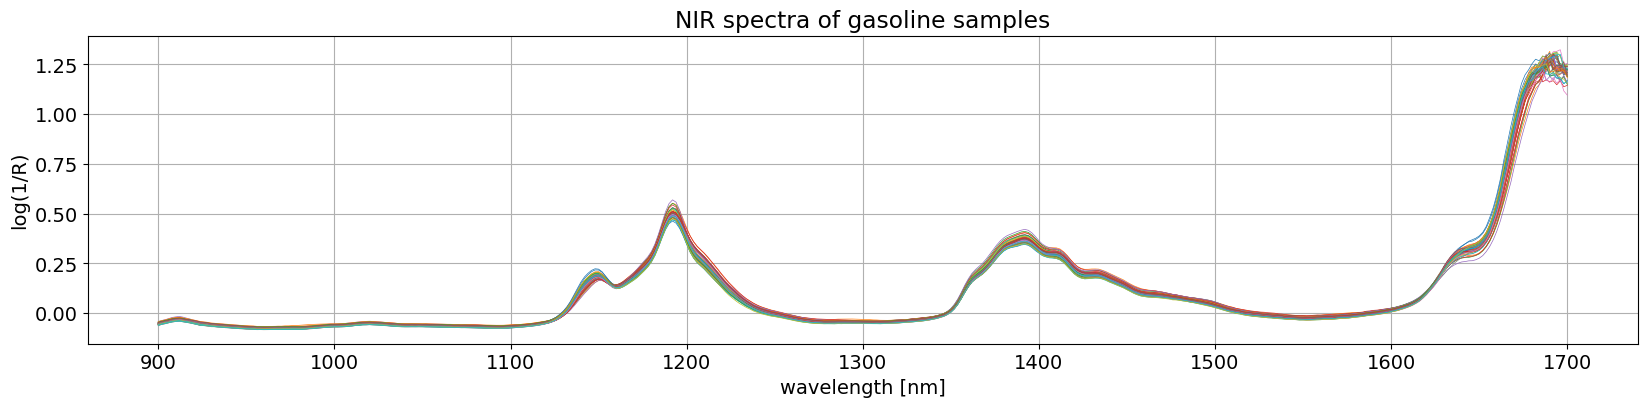

In [47]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

fig, ax = plt.subplots(figsize=(20, 4))
ax.plot(wls, xdata.values.T, linewidth=0.5)
ax.set_title('NIR spectra of %s samples' % dataset)
ax.set_xlabel('wavelength [nm]')
ax.set_ylabel('log(1/R)')

plt.grid()
plt.savefig('octane_001.png')
plt.show()

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(xdata, ydata, test_size=0.16, shuffle=False)

In [49]:
X_test

,NIR.900 nm,NIR.902 nm,NIR.904 nm,NIR.906 nm,NIR.908 nm,NIR.910 nm,NIR.912 nm,NIR.914 nm,NIR.916 nm,NIR.918 nm,...,NIR.1682 nm,NIR.1684 nm,NIR.1686 nm,NIR.1688 nm,NIR.1690 nm,NIR.1692 nm,NIR.1694 nm,NIR.1696 nm,NIR.1698 nm,NIR.1700 nm
51,-0.052634,-0.046971,-0.043205,-0.039538,-0.034724,-0.032414,-0.029820,-0.033670,-0.036481,-0.040107,...,1.205736,1.222295,1.238942,1.245682,1.191846,1.198974,1.180956,1.176291,1.152654,1.170770
52,-0.052700,-0.047331,-0.043577,-0.040344,-0.035613,-0.033652,-0.031383,-0.034717,-0.037500,-0.040242,...,1.231920,1.238705,1.261821,1.289389,1.218379,1.212102,1.235187,1.215633,1.222602,1.183570
53,-0.053394,-0.047990,-0.044082,-0.040690,-0.036469,-0.033663,-0.031475,-0.034740,-0.037418,-0.040692,...,1.201475,1.212914,1.228477,1.242877,1.190009,1.196491,1.198856,1.165040,1.189147,1.150035
54,-0.054134,-0.048487,-0.045171,-0.041012,-0.035553,-0.034104,-0.031523,-0.034866,-0.037200,-0.038979,...,1.170220,1.201926,1.162770,1.173205,1.162726,1.168570,1.148061,1.167755,1.137953,1.145351
55,-0.049623,-0.044263,-0.041154,-0.037335,-0.032926,-0.030602,-0.028713,-0.032058,-0.034363,-0.035440,...,1.182659,1.202795,1.229580,1.170451,1.189367,1.173706,1.198534,1.162526,1.195273,1.156451
56,-0.046884,-0.042360,-0.038683,-0.035291,-0.030175,-0.027898,-0.026519,-0.029413,-0.032182,-0.034033,...,1.206536,1.223194,1.247032,1.300765,1.207600,1.231914,1.245133,1.230234,1.264217,1.190865
57,-0.055555,-0.049867,-0.045942,-0.042266,-0.037195,-0.034837,-0.031842,-0.036051,-0.038897,-0.042842,...,1.167444,1.193289,1.209944,1.175943,1.159782,1.184718,1.155629,1.175611,1.117087,1.095777
58,-0.053693,-0.048020,-0.044677,-0.041021,-0.036254,-0.034531,-0.032428,-0.035264,-0.038362,-0.040816,...,1.217198,1.222375,1.238392,1.252411,1.195963,1.210064,1.199746,1.173102,1.191871,1.150779
59,-0.056311,-0.051231,-0.047483,-0.044605,-0.039404,-0.037526,-0.034336,-0.037852,-0.041023,-0.044488,...,1.247442,1.237687,1.246042,1.253986,1.211382,1.203032,1.209177,1.183871,1.175997,1.154696
60,-0.058805,-0.053311,-0.049543,-0.045053,-0.040598,-0.038965,-0.036749,-0.040284,-0.042080,-0.045058,...,1.211312,1.228345,1.237367,1.203006,1.200348,1.209557,1.182911,1.184077,1.154355,1.163959


# Partial Least Squares Regression

Now it’s time to get to the optimisation of the PLS regression. As anticipated above, we want to run a PLS regression with a variable number of components and test its performance in cross-validation. In practice we want to find the number of components that minimises the MSE. Let’s write a function for it.

Reference:
https://nirpyresearch.com/partial-least-squares-regression-python/

In [50]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error

list_mse = []
n_comp = int(xdata.shape[1] / 10)
component = np.arange(1, n_comp + 1)
    
for i in component:
    pls = PLSRegression(n_components=i)

    # Cross-validation
    y_cv = cross_val_predict(pls, X_train, y_train, cv=10)
    # Root Mean Square Error of Precision
    mse = mean_squared_error(y_train, y_cv, squared=True)
    list_mse.append(mse)

# Calculate and print the position of minimum in RMSE
mse_min = np.argmin(list_mse)
print('Suggested number of components: ', mse_min + 1)

Suggested number of components:  4


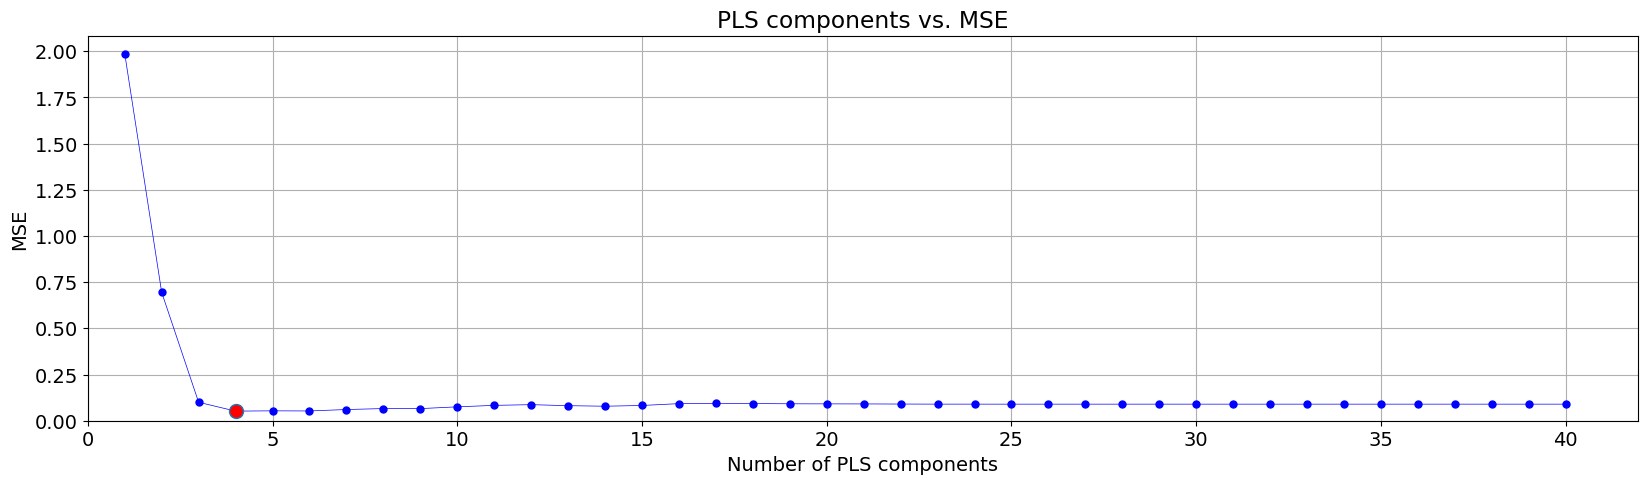

In [51]:
fig, ax = plt.subplots(figsize=(20, 5))

plt.plot(component, np.array(list_mse), '-o', ms=5, color = 'blue', mfc='blue', linewidth=0.5)
plt.plot(component[mse_min], np.array(list_mse)[mse_min], 'o', ms=10, mfc='red')
plt.xlabel('Number of PLS components')
plt.ylabel('MSE')
plt.title('PLS components vs. MSE')
plt.xlim(left=0)
plt.ylim(bottom=0)
#ax.xaxis.set_ticks(np.arange(0, n_comp, 1))
plt.grid()

plt.savefig('octane_002.png')
plt.show()

## Training data

In [52]:
from sklearn.metrics import r2_score

# Define PLS object with optimal number of components
pls_opt = PLSRegression(n_components=mse_min + 1)

# Fir to the entire dataset
pls_opt.fit(X_train, y_train)
y_train_c = pls_opt.predict(X_train)

# Cross-validation
y_train_cv = cross_val_predict(pls_opt, X_train, y_train, cv=10)

# Calculate scores for calibration and cross-validation
score_train_c = r2_score(y_train, y_train_c)
score_train_cv = r2_score(y_train, y_train_cv)

# Calculate mean squared error for calibration and cross validation
mse_train_c = mean_squared_error(y_train, y_train_c)
mse_train_cv = mean_squared_error(y_train, y_train_cv)

print('for Training data')
print('R2 calib: %5.3f'  % score_train_c)
print('R2 CV: %5.3f'  % score_train_cv)
print('MSE calib: %5.3f' % mse_train_c)
print('MSE CV: %5.3f' % mse_train_cv)

for Training data
R2 calib: 0.985
R2 CV: 0.977
MSE calib: 0.035
MSE CV: 0.052


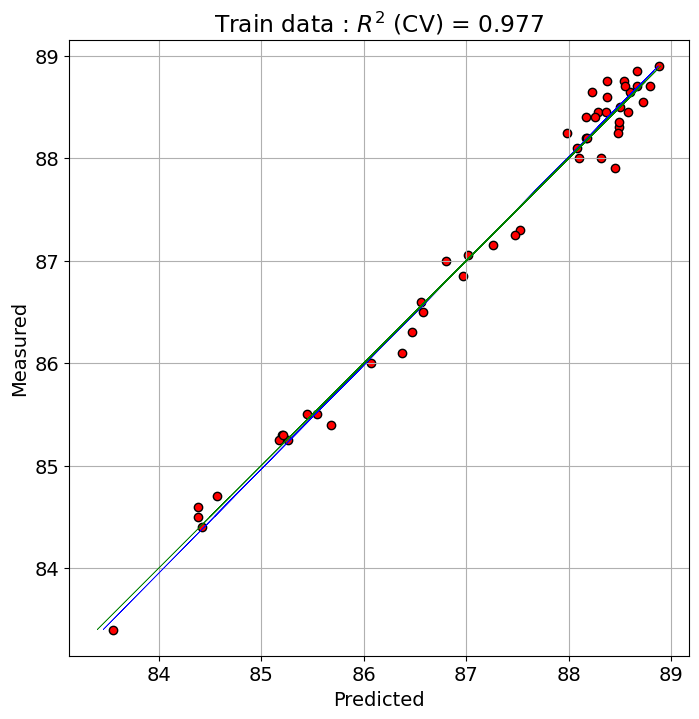

In [53]:
# Plot regression and figures of merit
rangey = max(y_train) - min(y_train)
rangex = max(y_train_c) - min(y_train_c)

# Fit a line to the CV vs response
z = np.polyfit(y_train, y_train_c, 1)
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(y_train_c, y_train, c='red', edgecolors='k')

# Plot the best fit line
ax.plot(np.polyval(z, y_train), y_train, c='blue', linewidth=0.5)

# Plot the ideal 1:1 line
ax.plot(y_train, y_train, color='green', linewidth=0.5)
plt.title('Train data : $R^{2}$ (CV) = ' + '{:.3f}'.format(score_train_cv))
plt.xlabel('Predicted')
plt.ylabel('Measured')
ax.axis('equal')
plt.grid()

plt.savefig('octane_003.png')
plt.show()

## Test data

In [54]:
# Fir to the entire dataset
pls_opt.fit(X_test, y_test)
y_test_c = pls_opt.predict(X_test)

# Cross-validation
if len(y_test) < 10:
    n_cv = len(y_test)
else:
    n_cv = 10
y_test_cv = cross_val_predict(pls_opt, X_test, y_test, cv=n_cv)

# Calculate scores for calibration and cross-validation
score_test_c = r2_score(y_test, y_test_c)
score_test_cv = r2_score(y_test, y_test_cv)

# Calculate mean squared error for calibration and cross validation
mse_test_c = mean_squared_error(y_test, y_test_c)
mse_test_cv = mean_squared_error(y_test, y_test_cv)

print('for Test data')
print('R2 calib: %5.3f'  % score_test_c)
print('R2 CV: %5.3f'  % score_test_cv)
print('MSE calib: %5.3f' % mse_test_c)
print('MSE CV: %5.3f' % mse_test_cv)

for Test data
R2 calib: 0.997
R2 CV: 0.953
MSE calib: 0.007
MSE CV: 0.106


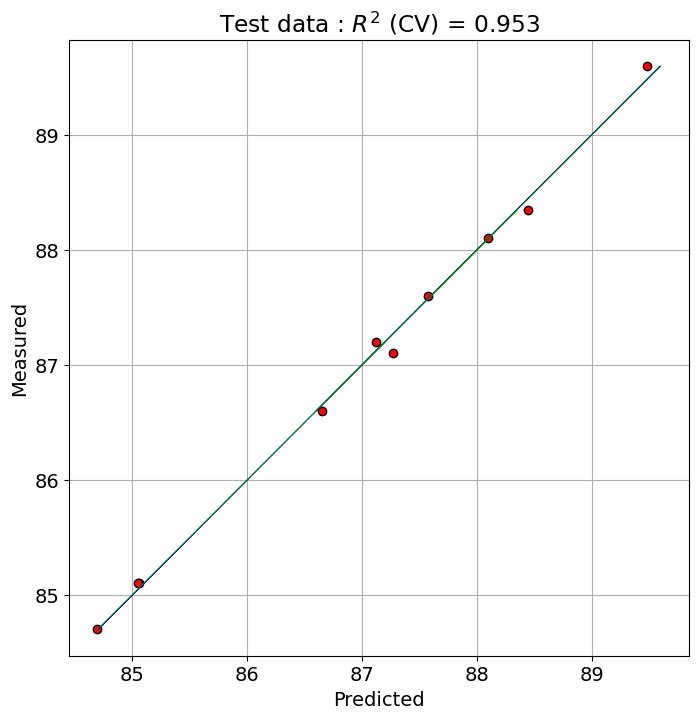

In [55]:
# Plot regression and figures of merit
rangey = max(y_test) - min(y_test)
rangex = max(y_test_c) - min(y_test_c)

# Fit a line to the CV vs response
z = np.polyfit(y_test, y_test_c, 1)
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(y_test_c, y_test, c='red', edgecolors='k')

# Plot the best fit line
ax.plot(np.polyval(z, y_test), y_test, c='blue', linewidth=0.5)

# Plot the ideal 1:1 line
ax.plot(y_test, y_test, color='green', linewidth=0.5)
plt.title('Test data : $R^{2}$ (CV) = ' + '{:.3f}'.format(score_test_cv))
plt.xlabel('Predicted')
plt.ylabel('Measured')
ax.axis('equal')
plt.grid()

plt.savefig('octane_004.png')
plt.show()